<a href="https://colab.research.google.com/github/Bstha123/CodeAlpha_Predictive_model/blob/main/MotorCycle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3: Predictive Modelling using Linear Regression**

**1. Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**2. Importing Datasets**

In [2]:
df = pd.read_csv("/content/BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.shape

(1061, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


<Axes: xlabel='year', ylabel='selling_price'>

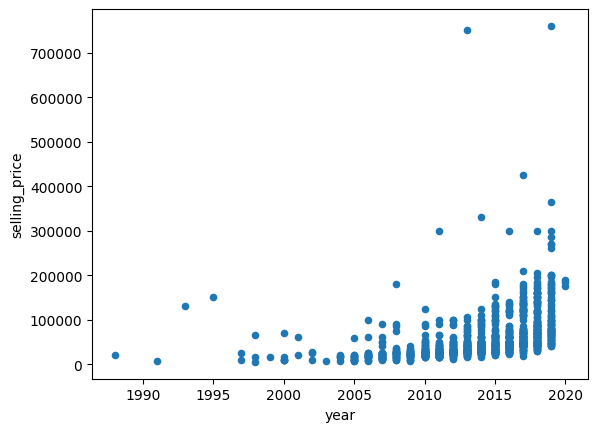

In [9]:
df.plot(kind='scatter',x = 'year', y= 'selling_price')

**3. Data Cleaning**

In [6]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [10]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [13]:
df.duplicated().sum()

4

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(622, 7)

In [16]:
df.owner.value_counts()

,count
owner,
1st owner,552
2nd owner,66
3rd owner,3
4th owner,1


In [17]:
# encoding "owner" column
df.replace({'owner':{'1st owner':0, '2nd owner':1, '3rd owner':2, '4th owner':3}},inplace = True)

In [20]:
df.seller_type.value_counts()

,count
seller_type,
Individual,619
Dealer,3


In [21]:
df.replace({'seller_type':{'Individual':1, 'Dealer':0}},inplace = True)

**Train Test Splitting**

In [24]:
X = df.drop(['name','selling_price'],axis=1)
y = df['selling_price']

In [26]:
X.shape, y.shape

((622, 5), (622,))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=3)

**Model Training**

In [29]:
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [32]:
lin_reg_model.coef_

array([ 4.63943969e+03, -3.96282688e+02, -5.47091056e+03, -1.18287070e-02,
        6.94822495e-01])

In [33]:
lin_reg_model.intercept_

-9348030.0019123

In [34]:
training_data_prediction = lin_reg_model.predict(X_train)

In [35]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9012853397144298


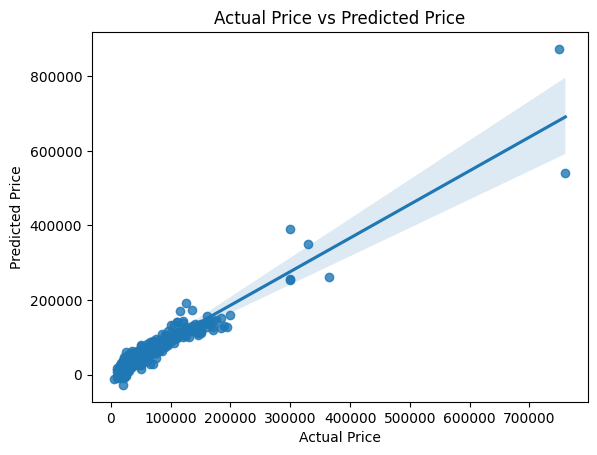

In [40]:
sns.regplot(x = y_train,y=training_data_prediction)
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Prediction on testing Data**

In [41]:
test_data_prediction = lin_reg_model.predict(X_test)

In [42]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8992056723661583


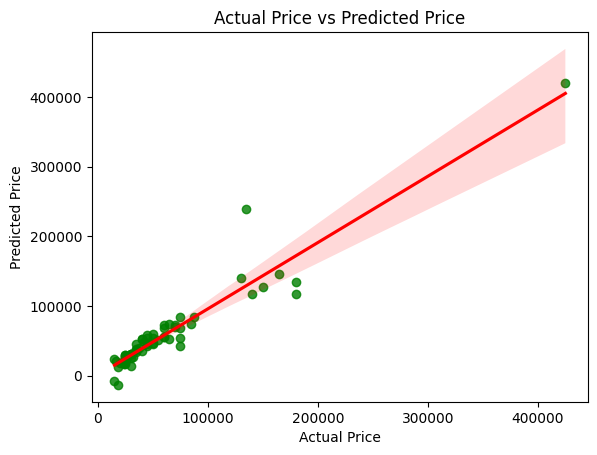

In [44]:
sns.regplot(x = y_test,y=test_data_prediction, scatter_kws={'color':'g'}, line_kws={'color':'red'})
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [45]:
X.columns

Index(['year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price'], dtype='object')

In [49]:
print(lin_reg_model.predict([[2018,1,0,50000,1500000]]))

[1055605.31676479]
